In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Create the folder if it doesn't exist
os.makedirs("figures", exist_ok=True)

In [3]:
task1_df = pd.read_csv("../data/task1_preprocessed.csv")
task1_ai_group = task1_df[task1_df['ai'] == True]
task1_manual_group = task1_df[task1_df['ai'] == False]

In [4]:
task2_df = pd.read_csv("../data/task2_preprocessed.csv")
task2_treatment = task2_df[task2_df['treatment'] == 'ai']
task2_control = task2_df[task2_df['treatment'] == 'human']

In [5]:
demo_columns = ['entry-demo-1', 'entry-demo-2', 'entry-demo-3', 'entry-demo-4', 'entry-demo-5']
column_labels = {
    'entry-demo-1': 'Gender',
    'entry-demo-2': 'Age',
    'entry-demo-3': 'Country',
    'entry-demo-4': 'Role',
    'entry-demo-5': 'Java Level'
}
category_orders = {
    'entry-demo-1': ['Man', 'Woman', 'Undisclosed'],
    'entry-demo-2': ['20-29', '30-39', '40-49', '50-59', '60-69', 'Undisclosed'],
    'entry-demo-4': ['Student', 'Hobbyist', 'Researcher', 'Professional', 'Undisclosed'], 
    'entry-demo-5': ['Beginner', 'Intermediate', 'Advanced']
}

In [6]:
# Define color scheme
colors = {
    'ai_dark_gray': '#4F4F4F',
    'manual_work': 'yellow',
    'treatment_blue': '#1f77b4',  # Blue for treatment
    'control_orange': '#ff7f0e'  # Orange for control
}

## Demographics for Task 1

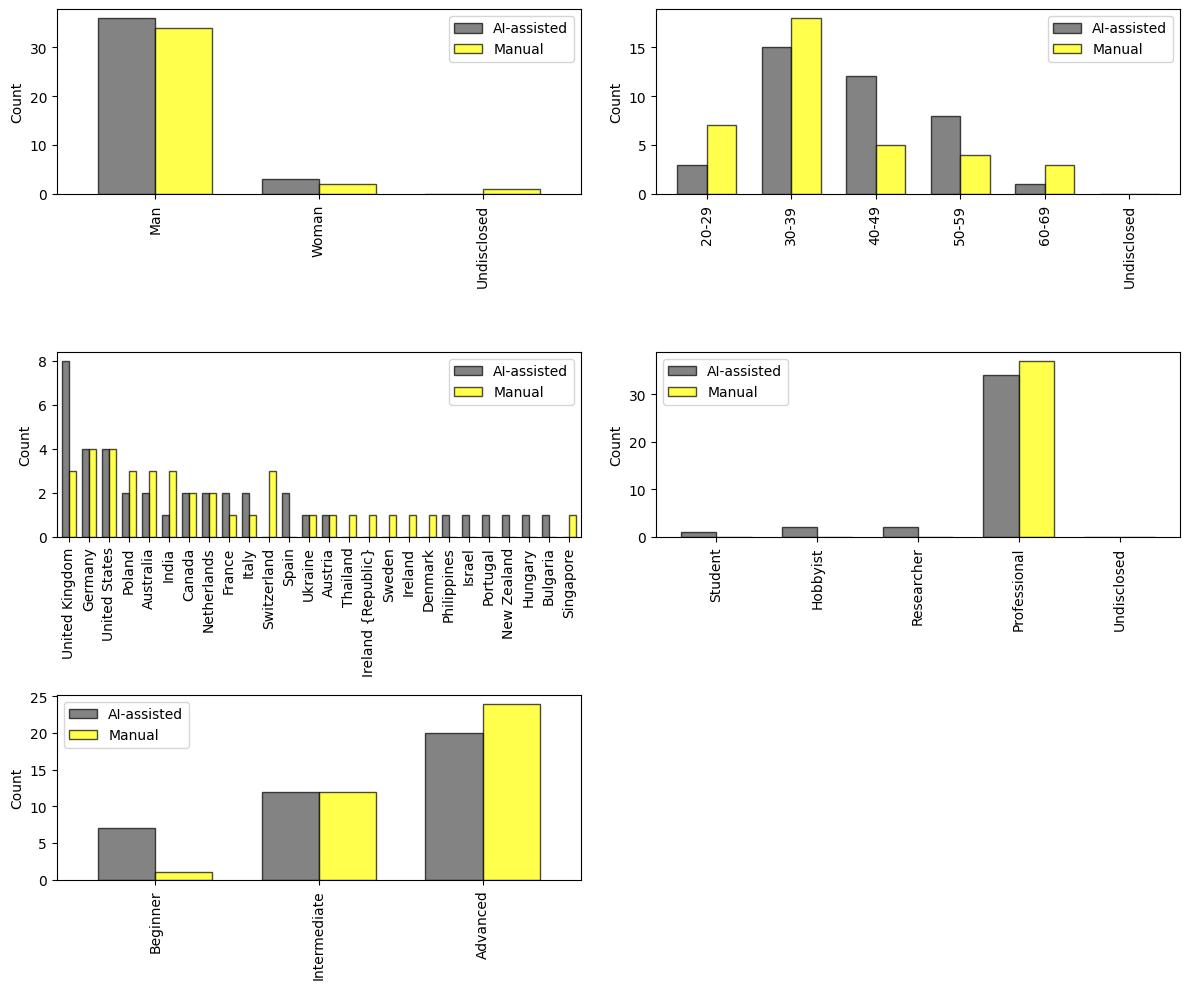

In [8]:
# Create a new figure for combined display
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(demo_columns):
    ax = axes[i]

    if column == 'entry-demo-3':  # Country
        country_order = task1_df[column].value_counts().index
        task1_df[column] = pd.Categorical(task1_df[column], categories=country_order, ordered=True)
        ai_counts = task1_df[task1_df['ai'] == True][column].value_counts().reindex(country_order, fill_value=0)
        manual_counts = task1_df[task1_df['ai'] == False][column].value_counts().reindex(country_order, fill_value=0)

    elif column in category_orders:
        preferred_order = category_orders[column]
        task1_df.loc[task1_df['ai'] == True, column] = pd.Categorical(
            task1_df.loc[task1_df['ai'] == True, column], categories=preferred_order, ordered=True)
        task1_df.loc[task1_df['ai'] == False, column] = pd.Categorical(
            task1_df.loc[task1_df['ai'] == False, column], categories=preferred_order, ordered=True)

        ai_counts = task1_df[task1_df['ai'] == True][column].value_counts().reindex(preferred_order, fill_value=0)
        manual_counts = task1_df[task1_df['ai'] == False][column].value_counts().reindex(preferred_order, fill_value=0)
    else:
        ai_counts = task1_df[task1_df['ai'] == True][column].value_counts()
        manual_counts = task1_df[task1_df['ai'] == False][column].value_counts()

    combined_counts = pd.DataFrame({'AI-assisted': ai_counts, 'Manual': manual_counts}).fillna(0)
    if not combined_counts.empty:
        combined_counts.plot(kind='bar', ax=ax, alpha=0.7,
                             color=[colors['ai_dark_gray'], colors['manual_work']],
                             edgecolor='black', width=0.7)
        ax.set_title('')  # <-- No title
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.legend(['AI-assisted', 'Manual'])

        # Save each subplot individually
        fig_indiv, ax_indiv = plt.subplots(figsize=(6, 4))
        combined_counts.plot(kind='bar', ax=ax_indiv, alpha=0.7,
                             color=[colors['ai_dark_gray'], colors['manual_work']],
                             edgecolor='black', width=0.7)
        ax_indiv.set_title('')  # <-- No title
        ax_indiv.set_xlabel('')
        ax_indiv.set_ylabel('Count')
        ax_indiv.legend(['AI-assisted', 'Manual'])
        plt.tight_layout()
        filename = f"figures/task1_{column_labels[column].lower().replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300)
        plt.close(fig_indiv)

    else:
        ax.axis('off')

# Remove any unused axes
if len(demo_columns) < len(axes):
    for j in range(len(demo_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [22]:
for column in demo_columns:
    if column == 'entry-demo-3':  # Country → Plotly map instead
        country_counts = task1_df[column].value_counts().reset_index()
        country_counts.columns = ["country", "count"]

        fig_map = px.choropleth(
            country_counts,
            locations="country",
            locationmode="country names",
            color="count",
            color_continuous_scale="RdYlGn",
            projection="natural earth"
        )

        # Increase legend font size
        fig_map.update_layout(
            coloraxis_colorbar=dict(
                tickfont=dict(size=24)
            ),
            margin=dict(l=0, r=0, t=30, b=0)
        )
        fig_map.write_html("figures/task1_country_map.html")

## Demographics for Task 2

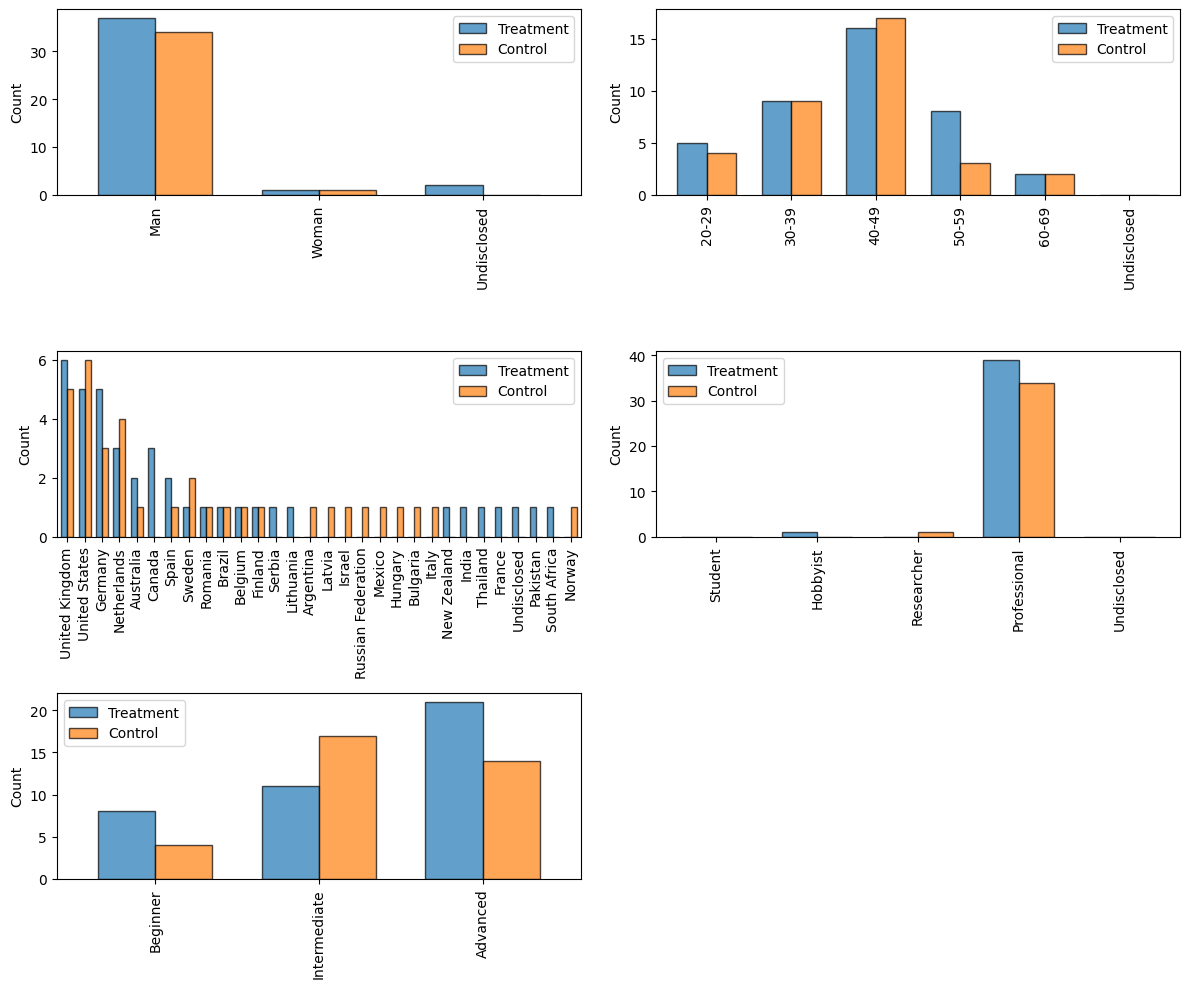

In [15]:
# Create the folder if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Create a new figure for combined display
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(demo_columns):
    ax = axes[i]

    if column == 'entry-demo-3':  # Special case for Country
        country_order = task2_df[column].value_counts().index
        task2_df[column] = pd.Categorical(task2_df[column], categories=country_order, ordered=True)

        treatment_counts = task2_df[task2_df['treatment'] == 'ai'][column].value_counts().reindex(country_order, fill_value=0)
        control_counts = task2_df[task2_df['treatment'] == 'human'][column].value_counts().reindex(country_order, fill_value=0)

    elif column in category_orders:
        preferred_order = category_orders[column]

        task2_df.loc[task2_df['treatment'] == 'ai', column] = pd.Categorical(
            task2_df.loc[task2_df['treatment'] == 'ai', column], categories=preferred_order, ordered=True)
        task2_df.loc[task2_df['treatment'] == 'human', column] = pd.Categorical(
            task2_df.loc[task2_df['treatment'] == 'human', column], categories=preferred_order, ordered=True)

        treatment_counts = task2_df[task2_df['treatment'] == 'ai'][column].value_counts().reindex(preferred_order, fill_value=0)
        control_counts = task2_df[task2_df['treatment'] == 'human'][column].value_counts().reindex(preferred_order, fill_value=0)
    else:
        treatment_counts = task2_df[task2_df['treatment'] == 'ai'][column].value_counts()
        control_counts = task2_df[task2_df['treatment'] == 'human'][column].value_counts()

    combined_counts = pd.DataFrame({'Treatment': treatment_counts, 'Control': control_counts}).fillna(0)
    if not combined_counts.empty:
        combined_counts.plot(kind='bar', ax=ax, alpha=0.7, 
                             color=[colors['treatment_blue'], colors['control_orange']], 
                             edgecolor='black', width=0.7)
        ax.set_title('')  # <-- Title removed
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.legend(['Treatment', 'Control'])

        # Save individual subplot without title
        fig_indiv, ax_indiv = plt.subplots(figsize=(6, 4))
        combined_counts.plot(kind='bar', ax=ax_indiv, alpha=0.7, 
                             color=[colors['treatment_blue'], colors['control_orange']], 
                             edgecolor='black', width=0.7)
        ax_indiv.set_title('')  # <-- Title removed
        ax_indiv.set_xlabel('')
        ax_indiv.set_ylabel('Count')
        ax_indiv.legend(['Treatment', 'Control'])
        plt.tight_layout()
        filename = f"figures/task2_{column_labels[column].lower().replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300)
        plt.close(fig_indiv)

    else:
        ax.set_title('')  # Also suppress title in empty fallback
        ax.axis('off')

# Remove unused axes if <6
if len(demo_columns) < len(axes):
    for j in range(len(demo_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [21]:
for column in demo_columns:
    if column == 'entry-demo-3':  # Country → Plotly map instead
        country_counts = task2_df[column].value_counts().reset_index()
        country_counts.columns = ["country", "count"]

        fig_map = px.choropleth(
            country_counts,
            locations="country",
            locationmode="country names",
            color="count",
            color_continuous_scale="RdYlGn",
            projection="natural earth"
        )

        # Increase legend font size
        fig_map.update_layout(
            coloraxis_colorbar=dict(
                tickfont=dict(size=24)
            ),
            margin=dict(l=0, r=0, t=30, b=0)
        )
        fig_map.write_html("figures/task2_country_map.html")